In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

###### 1. Importing datasets

In [2]:
### Importing dataset
movies_df= pd.read_csv('movies.dat',encoding='ISO-8859–1', sep="::", names=['MovieID','Title','Genres'])
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
### Importing dataset
rating_df= pd.read_csv('ratings.dat', encoding='ISO-8859-1', sep="::", names=['UserID','MovieID','Rating','Timestamp'])
rating_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
### Importing dataset
users_df= pd.read_csv('users.dat', encoding='ISO-8859-1', sep="::", names=['UserID','Gender','Age','Occupation','Zip-code'])
users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


##### 2. Creating a new dataset

In [5]:
dfratings= movies_df.merge(rating_df, on='MovieID', how='outer')
dfratings.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,5.0,978824268.0
1,1,Toy Story (1995),Animation|Children's|Comedy,6.0,4.0,978237008.0
2,1,Toy Story (1995),Animation|Children's|Comedy,8.0,4.0,978233496.0
3,1,Toy Story (1995),Animation|Children's|Comedy,9.0,5.0,978225952.0
4,1,Toy Story (1995),Animation|Children's|Comedy,10.0,5.0,978226474.0


In [6]:
Updated_Data= dfratings.merge(users_df, on='UserID', how='outer')
Updated_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,5.0,978824268.0,F,1.0,10.0,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1.0,5.0,978824351.0,F,1.0,10.0,48067
2,150,Apollo 13 (1995),Drama,1.0,5.0,978301777.0,F,1.0,10.0,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1.0,4.0,978300760.0,F,1.0,10.0,48067
4,527,Schindler's List (1993),Drama|War,1.0,5.0,978824195.0,F,1.0,10.0,48067


In [7]:
### Merged Dataset
Master_Data= Updated_Data[['UserID','MovieID', 'Title','UserID', 'Age', 'Gender','Occupation', 'Rating','Timestamp','Zip-code']]
Master_Data.head()

,UserID,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Timestamp,Zip-code
0,1.0,1,Toy Story (1995),1.0,1.0,F,10.0,5.0,978824268.0,48067
1,1.0,48,Pocahontas (1995),1.0,1.0,F,10.0,5.0,978824351.0,48067
2,1.0,150,Apollo 13 (1995),1.0,1.0,F,10.0,5.0,978301777.0,48067
3,1.0,260,Star Wars: Episode IV - A New Hope (1977),1.0,1.0,F,10.0,4.0,978300760.0,48067
4,1.0,527,Schindler's List (1993),1.0,1.0,F,10.0,5.0,978824195.0,48067


In [8]:
Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000386 entries, 0 to 1000385
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   UserID      1000209 non-null  float64
 1   MovieID     1000386 non-null  int64  
 2   Title       1000386 non-null  object 
 3   UserID      1000209 non-null  float64
 4   Age         1000209 non-null  float64
 5   Gender      1000209 non-null  object 
 6   Occupation  1000209 non-null  float64
 7   Rating      1000209 non-null  float64
 8   Timestamp   1000209 non-null  float64
 9   Zip-code    1000209 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 84.0+ MB


##### 3. Explore the datasets using visual representations
User Age Distribution

User rating of the movie “Toy Story”

Top 25 movies by viewership rating

Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [9]:
df_Age= Master_Data['Age'].value_counts()
df_Age

25.0    395556
35.0    199003
18.0    183536
45.0     83633
50.0     72490
56.0     38780
1.0      27211
Name: Age, dtype: int64

<Axes: title={'center': 'Age Distribution of Users'}, xlabel='Age', ylabel='No. of Users'>

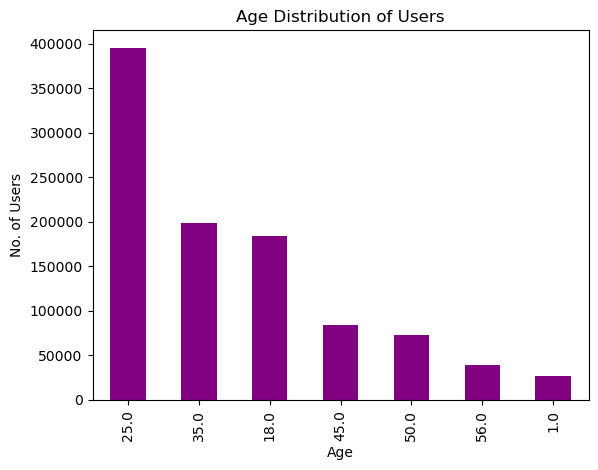

In [10]:
### Plt for user age distribution
df_Age.plot(kind='bar', color= 'purple', xlabel='Age', ylabel='No. of Users', title='Age Distribution of Users')

In [11]:
UserRatings= Master_Data[Master_Data['Title'].str.contains('Toy Story')== True]
UserRatings

,UserID,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Timestamp,Zip-code
0,1.0,1,Toy Story (1995),1.0,1.0,F,10.0,5.0,978824268.0,48067
50,1.0,3114,Toy Story 2 (1999),1.0,1.0,F,10.0,4.0,978302174.0,48067
53,6.0,1,Toy Story (1995),6.0,50.0,F,9.0,4.0,978237008.0,55117
124,8.0,1,Toy Story (1995),8.0,25.0,M,12.0,4.0,978233496.0,11413
263,9.0,1,Toy Story (1995),9.0,25.0,M,17.0,5.0,978225952.0,61614
...,...,...,...,...,...,...,...,...,...,...
999165,3023.0,3114,Toy Story 2 (1999),3023.0,25.0,F,7.0,4.0,970471948.0,92108
999204,5800.0,3114,Toy Story 2 (1999),5800.0,35.0,M,18.0,5.0,958015250.0,90804
999663,2189.0,3114,Toy Story 2 (1999),2189.0,1.0,M,10.0,4.0,974607816.0,60148
1000046,159.0,3114,Toy Story 2 (1999),159.0,45.0,F,0.0,4.0,989966944.0,37922


In [12]:
Toystory= UserRatings.groupby(['Title','Rating']).size()
Toystory

Title               Rating
Toy Story (1995)    1.0        16
                    2.0        61
                    3.0       345
                    4.0       835
                    5.0       820
Toy Story 2 (1999)  1.0        25
                    2.0        44
                    3.0       214
                    4.0       578
                    5.0       724
dtype: int64

<Axes: xlabel='No. of Rating', ylabel='Title and Rating'>

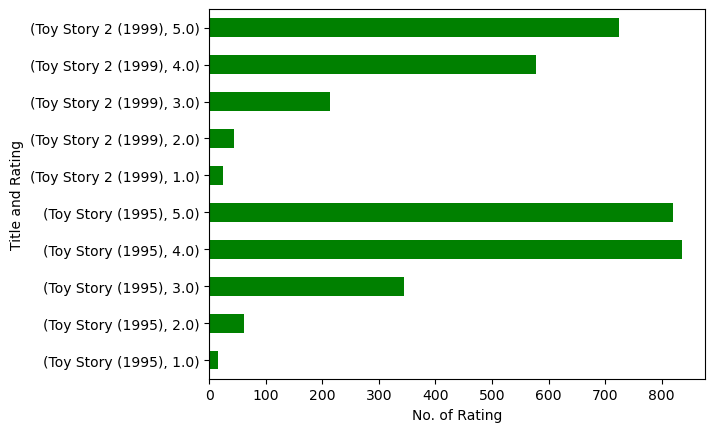

In [13]:
####User Rating of the movie ToyStory    
Toystory.plot(kind='barh', color='green', stacked=False, xlabel='No. of Rating',ylabel='Title and Rating')

In [14]:
#### Top 25 movies by viewership rating
Top_25=Master_Data.groupby(['MovieID','Title']).Timestamp.count().sort_values(ascending=False).head(25)
Top_25

MovieID  Title                                                
2858     American Beauty (1999)                                   3428
260      Star Wars: Episode IV - A New Hope (1977)                2991
1196     Star Wars: Episode V - The Empire Strikes Back (1980)    2990
1210     Star Wars: Episode VI - Return of the Jedi (1983)        2883
480      Jurassic Park (1993)                                     2672
2028     Saving Private Ryan (1998)                               2653
589      Terminator 2: Judgment Day (1991)                        2649
2571     Matrix, The (1999)                                       2590
1270     Back to the Future (1985)                                2583
593      Silence of the Lambs, The (1991)                         2578
1580     Men in Black (1997)                                      2538
1198     Raiders of the Lost Ark (1981)                           2514
608      Fargo (1996)                                             2513
2762     Sixth

In [15]:
#### Ratings for all the movies reviewed by for a particular user of user id = 2696
rating_df[rating_df['UserID']==2696]

,UserID,MovieID,Rating,Timestamp
440667,2696,1258,4,973308710
440668,2696,1270,2,973308676
440669,2696,1617,4,973308842
440670,2696,1625,4,973308842
440671,2696,1644,2,973308920
440672,2696,1645,4,973308904
440673,2696,1805,4,973308886
440674,2696,1892,4,973308904
440675,2696,800,5,973308842
440676,2696,2338,2,973308920


#### Feature Engineering:
    Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
    Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
    Determine the features affecting the ratings of any particular movie.
    Develop an appropriate model to predict the movie ratings

In [16]:
Split_genres=movies_df['Genres'].str.split('|')
Split_genres

0        [Animation, Children's, Comedy]
1       [Adventure, Children's, Fantasy]
2                      [Comedy, Romance]
3                        [Comedy, Drama]
4                               [Comedy]
                      ...               
3878                            [Comedy]
3879                             [Drama]
3880                             [Drama]
3881                             [Drama]
3882                   [Drama, Thriller]
Name: Genres, Length: 3883, dtype: object

In [17]:
#### Finding out all the unique genres
uniquegenres=set()
for i in Split_genres:
    uniquegenres= uniquegenres.union(set(i))
uniquegenres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [18]:
Onehot_encoding= movies_df['Genres'].str.get_dummies('|')

In [19]:
Onehot_encoding.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
#### Seperate column for each genre category with one-hot encoding
pd.concat([movies_df, Onehot_encoding], axis=1)

,MovieID,Title,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
### Features affecting rating of any particular movie.
Master_Data['Gender'].replace('F',1)

0          1
1          1
2          1
3          1
4          1
          ..
1000381    M
1000382    M
1000383    M
1000384    M
1000385    M
Name: Gender, Length: 1000386, dtype: object

In [22]:
Master_Data['Gender'].replace('M',0)

0          F
1          F
2          F
3          F
4          F
          ..
1000381    0
1000382    0
1000383    0
1000384    0
1000385    0
Name: Gender, Length: 1000386, dtype: object

<Axes: title={'center': 'Ratings given by Males and Females'}, xlabel='Gender', ylabel='No.of ratings'>

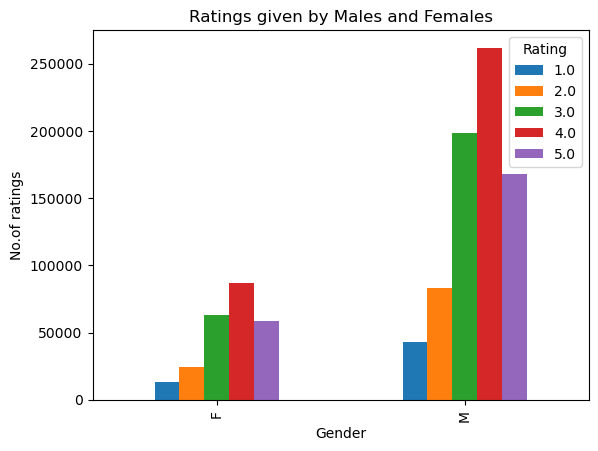

In [23]:
Master_Data.groupby(['Gender','Rating']).size().unstack().plot(kind='bar',ylabel='No.of ratings', title='Ratings given by Males and Females')

<Axes: title={'center': 'Ratings given by different age groups'}, xlabel='Age', ylabel='No.of ratings'>

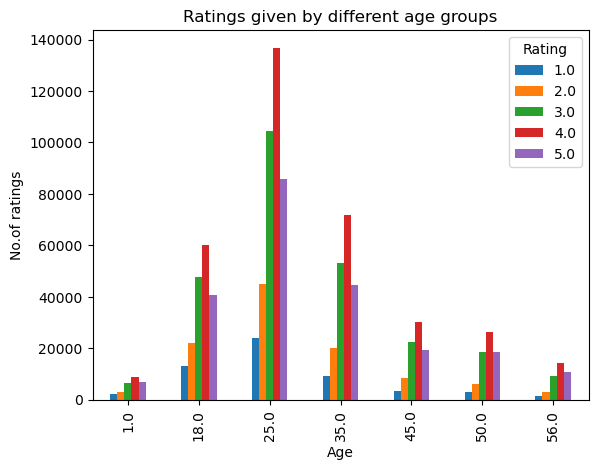

In [24]:
Master_Data.groupby(['Age','Rating']).size().unstack().plot(kind='bar',ylabel='No.of ratings', title='Ratings given by different age groups')

<Axes: title={'center': 'Ratings given by people having different occupation'}, xlabel='Occupation', ylabel='No.of ratings'>

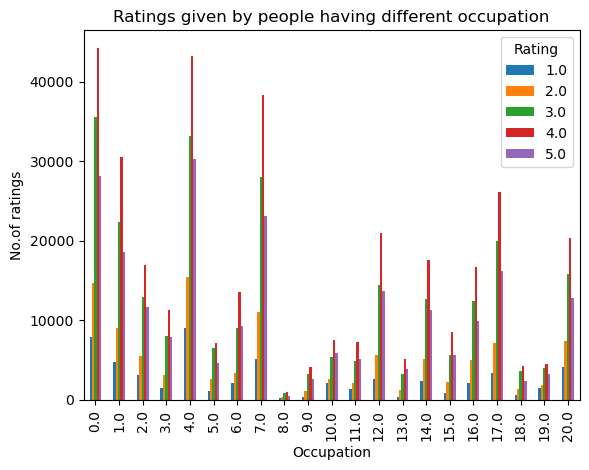

In [25]:
Master_Data.groupby(['Occupation','Rating']).size().unstack().plot(kind='bar',ylabel='No.of ratings', title='Ratings given by people having different occupation')

In [26]:
#### Deploy model for predicting the movie ratings
sample_data= Master_Data[:500]
sample_data

,UserID,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Timestamp,Zip-code
0,1.0,1,Toy Story (1995),1.0,1.0,F,10.0,5.0,978824268.0,48067
1,1.0,48,Pocahontas (1995),1.0,1.0,F,10.0,5.0,978824351.0,48067
2,1.0,150,Apollo 13 (1995),1.0,1.0,F,10.0,5.0,978301777.0,48067
3,1.0,260,Star Wars: Episode IV - A New Hope (1977),1.0,1.0,F,10.0,4.0,978300760.0,48067
4,1.0,527,Schindler's List (1993),1.0,1.0,F,10.0,5.0,978824195.0,48067
...,...,...,...,...,...,...,...,...,...,...
495,10.0,1197,"Princess Bride, The (1987)",10.0,35.0,F,1.0,5.0,979167660.0,95370
496,10.0,1198,Raiders of the Lost Ark (1981),10.0,35.0,F,1.0,5.0,978225630.0,95370
497,10.0,1200,Aliens (1986),10.0,35.0,F,1.0,5.0,979168160.0,95370
498,10.0,1201,"Good, The Bad and The Ugly, The (1966)",10.0,35.0,F,1.0,2.0,978225853.0,95370


In [27]:
sampleratings= sample_data['Rating'].values
sampleratings

array([5., 5., 5., 4., 5., 4., 4., 4., 5., 4., 3., 3., 3., 4., 3., 4., 4.,
       5., 5., 5., 5., 4., 5., 3., 4., 4., 5., 5., 4., 4., 4., 5., 4., 5.,
       4., 4., 5., 4., 3., 3., 5., 4., 3., 4., 4., 4., 4., 5., 4., 5., 4.,
       4., 4., 4., 4., 4., 5., 5., 4., 2., 4., 4., 3., 4., 4., 4., 3., 4.,
       5., 4., 4., 5., 4., 3., 4., 4., 5., 4., 5., 4., 4., 3., 3., 5., 4.,
       4., 4., 4., 5., 3., 5., 3., 4., 3., 4., 3., 3., 3., 4., 5., 3., 3.,
       4., 1., 5., 4., 5., 5., 5., 3., 3., 4., 5., 4., 4., 3., 5., 3., 4.,
       3., 3., 4., 4., 5., 4., 3., 4., 4., 4., 4., 5., 4., 3., 3., 5., 4.,
       4., 5., 5., 4., 4., 3., 5., 4., 5., 4., 4., 4., 3., 5., 5., 5., 3.,
       4., 4., 2., 3., 5., 3., 5., 3., 3., 3., 5., 4., 3., 4., 5., 5., 5.,
       5., 3., 5., 5., 4., 3., 4., 4., 5., 5., 5., 3., 4., 5., 5., 4., 3.,
       3., 4., 4., 4., 3., 5., 5., 3., 5., 5., 4., 3., 4., 5., 3., 5., 4.,
       4., 3., 2., 4., 4., 5., 3., 3., 5., 3., 3., 5., 3., 3., 2., 3., 5.,
       3., 5., 5., 2., 4.

In [28]:
df_columns= sample_data[['MovieID','Age','Occupation']].values
df_columns

array([[1.000e+00, 1.000e+00, 1.000e+01],
       [4.800e+01, 1.000e+00, 1.000e+01],
       [1.500e+02, 1.000e+00, 1.000e+01],
       ...,
       [1.200e+03, 3.500e+01, 1.000e+00],
       [1.201e+03, 3.500e+01, 1.000e+00],
       [1.203e+03, 3.500e+01, 1.000e+00]])

In [29]:
train, test, train_sampleratings, test_sampleratings= train_test_split(df_columns, sampleratings, test_size=0.2, random_state=10)

In [30]:
train

array([[1.265e+03, 2.500e+01, 1.700e+01],
       [3.408e+03, 5.000e+01, 9.000e+00],
       [3.178e+03, 2.500e+01, 1.700e+01],
       ...,
       [1.097e+03, 3.500e+01, 1.000e+00],
       [4.000e+00, 2.500e+01, 1.200e+01],
       [2.500e+01, 2.500e+01, 1.700e+01]])

In [31]:
test


array([[3.370e+02, 2.500e+01, 1.200e+01],
       [5.960e+02, 3.500e+01, 1.000e+00],
       [3.770e+02, 2.500e+01, 1.200e+01],
       [1.589e+03, 2.500e+01, 1.200e+01],
       [3.600e+01, 2.500e+01, 1.200e+01],
       [1.358e+03, 2.500e+01, 1.700e+01],
       [4.700e+01, 2.500e+01, 1.700e+01],
       [1.197e+03, 3.500e+01, 1.000e+00],
       [4.650e+02, 2.500e+01, 1.200e+01],
       [5.270e+02, 2.500e+01, 1.700e+01],
       [9.240e+02, 3.500e+01, 1.000e+00],
       [3.450e+02, 2.500e+01, 1.200e+01],
       [5.270e+02, 2.500e+01, 1.200e+01],
       [2.324e+03, 2.500e+01, 1.200e+01],
       [3.253e+03, 2.500e+01, 1.700e+01],
       [7.650e+02, 3.500e+01, 1.000e+00],
       [2.692e+03, 1.000e+00, 1.000e+01],
       [2.804e+03, 1.000e+00, 1.000e+01],
       [1.020e+03, 3.500e+01, 1.000e+00],
       [1.840e+03, 2.500e+01, 1.200e+01],
       [3.390e+02, 3.500e+01, 1.000e+00],
       [8.300e+02, 3.500e+01, 1.000e+00],
       [1.032e+03, 3.500e+01, 1.000e+00],
       [2.858e+03, 2.500e+01, 1.20

In [32]:
train_sampleratings

array([4., 5., 3., 4., 5., 5., 3., 4., 4., 5., 3., 4., 2., 5., 5., 4., 5.,
       5., 5., 4., 3., 3., 5., 2., 5., 4., 3., 5., 4., 4., 4., 2., 4., 3.,
       4., 3., 3., 4., 3., 4., 3., 5., 4., 3., 5., 3., 3., 5., 3., 2., 4.,
       5., 5., 3., 3., 3., 5., 3., 5., 5., 4., 3., 4., 3., 4., 3., 5., 4.,
       5., 3., 4., 3., 2., 4., 3., 3., 4., 4., 4., 5., 3., 4., 4., 5., 4.,
       4., 3., 4., 3., 5., 5., 4., 4., 2., 5., 4., 5., 3., 3., 4., 4., 4.,
       5., 4., 4., 3., 4., 3., 5., 5., 5., 2., 4., 4., 5., 5., 5., 2., 3.,
       5., 4., 3., 4., 4., 4., 5., 5., 2., 4., 5., 5., 5., 5., 4., 4., 4.,
       3., 4., 5., 5., 3., 3., 4., 4., 3., 4., 4., 4., 3., 3., 3., 4., 4.,
       3., 5., 4., 3., 5., 3., 4., 3., 3., 4., 3., 3., 3., 5., 4., 4., 4.,
       3., 4., 5., 4., 4., 5., 5., 5., 5., 4., 4., 3., 4., 2., 5., 3., 4.,
       5., 4., 5., 5., 4., 3., 5., 5., 3., 4., 4., 4., 3., 4., 4., 4., 5.,
       5., 3., 5., 3., 4., 5., 5., 4., 3., 4., 4., 5., 3., 1., 3., 4., 5.,
       3., 5., 3., 4., 2.

In [33]:
test_sampleratings

array([5., 4., 4., 4., 4., 4., 5., 5., 5., 5., 3., 3., 4., 3., 4., 4., 4.,
       5., 3., 4., 5., 5., 4., 5., 3., 4., 4., 3., 5., 5., 5., 5., 4., 4.,
       3., 4., 2., 5., 5., 3., 4., 3., 4., 3., 4., 3., 4., 4., 3., 2., 2.,
       4., 5., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 3., 4., 4.,
       4., 5., 4., 5., 4., 5., 4., 5., 3., 4., 3., 4., 4., 3., 5., 5., 4.,
       5., 5., 4., 3., 3., 5., 5., 3., 4., 3., 4., 4., 4., 5., 5.])

In [34]:
##### Logistic Regression
log_reg= LogisticRegression()
log_reg.fit(train, train_sampleratings)
pred= log_reg.predict(test)
round(log_reg.score(train, train_sampleratings)*100,2)

41.5